## Exercise 0

In [155]:
def github() -> str:

    return "https://github.com/jphopk/ECON481-Homework/blob/main/ECON481-HW4-JustinHopkins.py"

## Exercise 1

In [156]:
import pandas as pd

def load_data() -> pd.DataFrame:
    teslaData = pd.read_csv("https://lukashager.netlify.app/econ-481/data/TSLA.csv")

    return teslaData

a = load_data()
a
print(a)

            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
1     2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2     2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
3     2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
4     2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...          ...         ...         ...         ...         ...         ...   
3467  2024-04-09  172.910004  179.220001  171.919998  176.880005  176.880005   
3468  2024-04-10  173.039993  174.929993  170.009995  171.759995  171.759995   
3469  2024-04-11  172.550003  175.880005  168.509995  174.600006  174.600006   
3470  2024-04-12  172.339996  173.809998  170.360001  171.050003  171.050003   
3471  2024-04-15  170.248001  170.690002  162.322006  162.610001  162.610001   

         Volume  
0     281494500  
1  

## Exercise 2

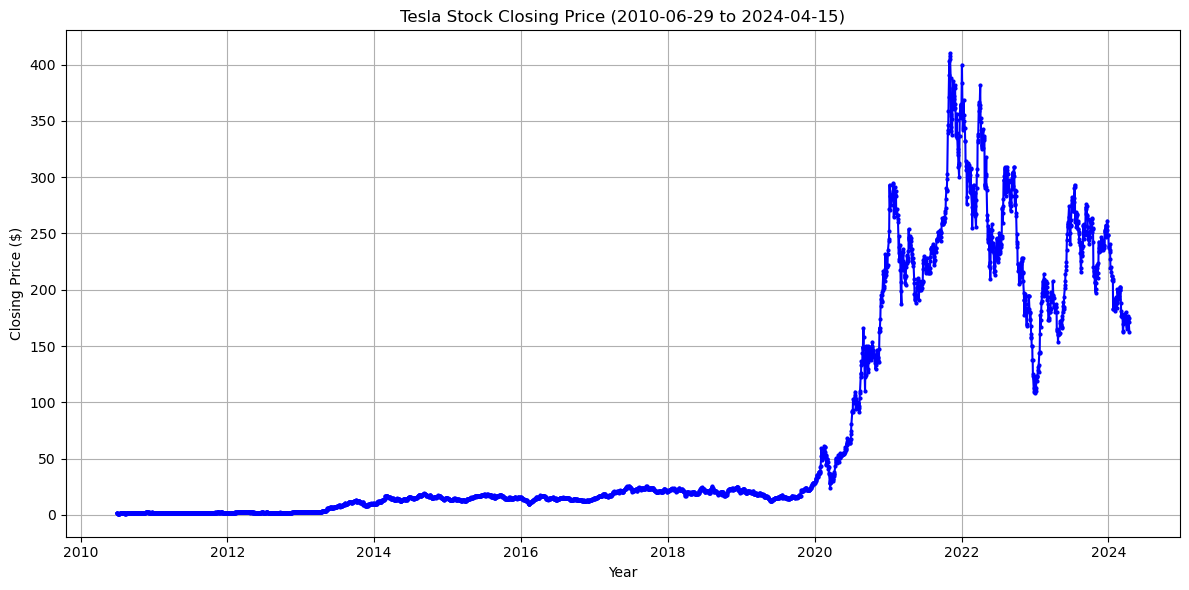

In [157]:
import matplotlib.pyplot as plt

def plot_close(df: pd.DataFrame, start: str = '2010-06-29', end: str = '2024-04-15') -> None:
    df['Date'] = pd.to_datetime(df['Date'])   
    df.set_index('Date', inplace=True)
    
    myDates = df.loc[start:end]
    
    
    plt.figure(figsize=(12, 6))
    plt.plot(myDates.index, myDates['Close'], color='blue', marker='o', markersize = 2, linestyle='-')
    plt.title(f'Tesla Stock Closing Price ({start} to {end})')
    plt.xlabel('Year')
    plt.ylabel('Closing Price ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_close(load_data())

## Exercise 3

In [181]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

def autoregress(df: pd.DataFrame) -> float:
    
    df.set_index('Date', inplace=True)
    df.index = pd.to_datetime(df.index)
    
    df['CurrentMinusBefore'] = df['Close'].diff()
    df.dropna(inplace=True)
    df['Close_lag'] = df['CurrentMinusBefore'].shift(periods=1)
    df.dropna(inplace=True)
    
    #print(df)
    
    Y = df['CurrentMinusBefore']
    X = df['Close_lag']
    
    model = sm.OLS(Y, X)
    results = model.fit(cov_type='HC1')
    
    return results.tvalues['Close_lag']
print(autoregress(load_data()))

-0.7824767386823547


## Exercise 4

In [193]:
from sklearn.linear_model import LogisticRegression

def autoregress_logit(df: pd.DataFrame) -> float:
    df.set_index('Date', inplace=True)
    df.index = pd.to_datetime(df.index)
    
    df['CurrentMinusBefore'] = df['Close'].diff()
    df.dropna(inplace=True)
    df['Close_lag'] = df['CurrentMinusBefore'].shift(periods=1)
    df.dropna(inplace=True)
    
    #print(df)
    
    Y = df['CurrentMinusBefore']
    X = df['Close_lag']

    newY = Y.map(lambda x: 1 if x > 0 else 0)
    
    model = sm.Logit(newY, X)
    results = model.fit()
    
    return results.tvalues['Close_lag']

print(autoregress_logit(load_data()))

Optimization terminated successfully.
         Current function value: 0.692939
         Iterations 3
-1.1998922859586534


## Exercise 5

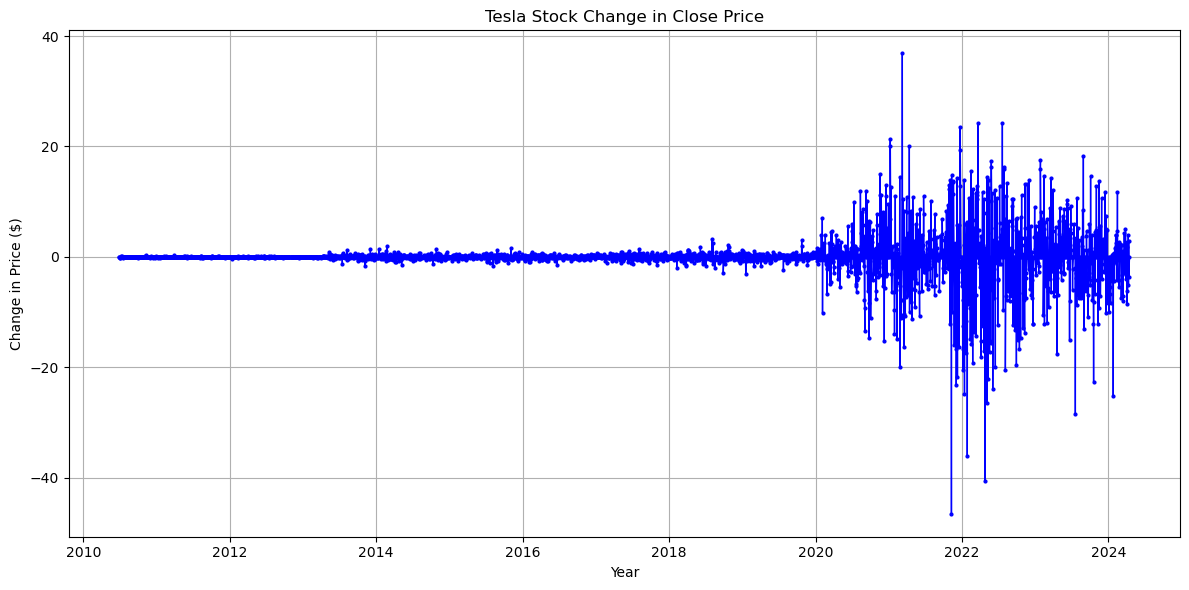

In [159]:
def plot_delta(df: pd.DataFrame) -> None:
    df.set_index('Date', inplace=True)
    df.index = pd.to_datetime(df.index)
    
    df['Close_lag'] = df['Close'].shift(periods=1, freq = 'D')
    df['CurrentMinusLag'] = df['Close'] - df['Close_lag']
    df.fillna(0, inplace=True)

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['CurrentMinusLag'] , color='blue', marker='o', markersize = 2, linestyle='-', linewidth = 1)
    plt.title('Tesla Stock Change in Close Price')
    plt.xlabel('Year')
    plt.ylabel('Change in Price ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_delta(load_data())